# Timer log

In [51]:
import logging
import time
from functools import wraps
import logging
from collections import Counter
import re
import numpy as np
import matplotlib.pyplot as plt

logger = logging.getLogger(__name__)
logger.setLevel("DEBUG")
handler = logging.StreamHandler()
log_format = "%(asctime)s %(levelname)s -- %(message)s"
formatter = logging.Formatter(log_format)
handler.setFormatter(formatter)
logger.addHandler(handler)

In [36]:
# Creation of the decorater
def timed(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        logger.debug("{} ran in {}s".format(func.__name__, round(end - start, 2)))
        return result
    return wrapper

In [37]:
# Function with dictionnary 
@timed
def function1_word(filename):
    counts = dict()
    words = re.findall(r'\w+', open(filename).read().lower())

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

function1_word("shakespeare-artwork.txt")

2023-01-05 15:43:56,998 DEBUG -- function1_word ran in 0.65s


{'this': 6853,
 'is': 9784,
 'the': 27660,
 '100th': 1,
 'etext': 245,
 'file': 20,
 'presented': 18,
 'by': 4476,
 'project': 251,
 'gutenberg': 236,
 'and': 26784,
 'in': 11123,
 'cooperation': 2,
 'with': 8016,
 'world': 905,
 'library': 232,
 'inc': 224,
 'from': 2654,
 'their': 2077,
 'of': 18191,
 'future': 17,
 'shakespeare': 268,
 'cdroms': 1,
 'often': 124,
 'releases': 1,
 'etexts': 8,
 'that': 11549,
 'are': 3894,
 'not': 8740,
 'placed': 11,
 'public': 57,
 'domain': 4,
 'has': 388,
 'certain': 176,
 'copyright': 228,
 'implications': 1,
 'you': 13860,
 'should': 1580,
 'read': 207,
 'electronic': 443,
 'version': 222,
 'complete': 246,
 'works': 249,
 'william': 349,
 '1990': 221,
 '1993': 221,
 'provided': 253,
 'illinois': 223,
 'benedictine': 223,
 'college': 226,
 'permission': 225,
 'machine': 223,
 'readable': 224,
 'copies': 446,
 'may': 1876,
 'be': 7130,
 'distributed': 443,
 'so': 5282,
 'long': 704,
 'as': 5975,
 'such': 1622,
 '1': 309,
 'for': 8341,
 'your': 6

In [20]:
# Function with counter
@timed
def function2_word(filename):
  words = re.findall(r'\w+', open(filename).read().lower())
  word_counter = Counter(words)
  with open(filename) as file:
      for line in file:
          line_letters = [
              char for char in line.lower() if char.isalpha()
          ]
          word_counter.update(Counter(line_letters))
  return word_counter

function2_word("shakespeare-artwork.txt")

2023-01-05 15:28:33,507 DEBUG -- function2_word ran in 1.81s


Counter({'this': 6853,
         'is': 9784,
         'the': 27660,
         '100th': 1,
         'etext': 245,
         'file': 20,
         'presented': 18,
         'by': 4476,
         'project': 251,
         'gutenberg': 236,
         'and': 26784,
         'in': 11123,
         'cooperation': 2,
         'with': 8016,
         'world': 905,
         'library': 232,
         'inc': 224,
         'from': 2654,
         'their': 2077,
         'of': 18191,
         'future': 17,
         'shakespeare': 268,
         'cdroms': 1,
         'often': 124,
         'releases': 1,
         'etexts': 8,
         'that': 11549,
         'are': 3894,
         'not': 8740,
         'placed': 11,
         'public': 57,
         'domain': 4,
         'has': 388,
         'certain': 176,
         'copyright': 228,
         'implications': 1,
         'you': 13860,
         'should': 1580,
         'read': 207,
         'electronic': 443,
         'version': 222,
         'complete': 246,
       

For the function with dictionnary, the time execution is 0.76 secondes and with the counter the execution took 1.81 seconds. The dictionary functions is two times faster. The counter is less flexible so it's more time to execute for long text such as our.

In [39]:
distributionf1 = []
distributionf2 = []
for i in range(100):
   start_time = time.time()
   function1_word("shakespeare-artwork.txt")
   f1 = time.time() - start_time

   start_time = time.time()
   function2_word("shakespeare-artwork.txt")
   f2 = time.time() - start_time

   distributionf1.append(f1)
   distributionf2.append(f2)


2023-01-05 16:09:04,065 DEBUG -- function1_word ran in 0.56s
2023-01-05 16:09:05,971 DEBUG -- function2_word ran in 1.9s
2023-01-05 16:09:06,413 DEBUG -- function1_word ran in 0.44s
2023-01-05 16:09:08,275 DEBUG -- function2_word ran in 1.86s
2023-01-05 16:09:08,742 DEBUG -- function1_word ran in 0.46s
2023-01-05 16:09:10,381 DEBUG -- function2_word ran in 1.64s
2023-01-05 16:09:10,836 DEBUG -- function1_word ran in 0.45s
2023-01-05 16:09:12,583 DEBUG -- function2_word ran in 1.74s
2023-01-05 16:09:13,058 DEBUG -- function1_word ran in 0.47s
2023-01-05 16:09:15,149 DEBUG -- function2_word ran in 2.09s
2023-01-05 16:09:15,631 DEBUG -- function1_word ran in 0.48s
2023-01-05 16:09:17,382 DEBUG -- function2_word ran in 1.75s
2023-01-05 16:09:17,972 DEBUG -- function1_word ran in 0.59s
2023-01-05 16:09:19,828 DEBUG -- function2_word ran in 1.85s
2023-01-05 16:09:20,295 DEBUG -- function1_word ran in 0.46s
2023-01-05 16:09:21,949 DEBUG -- function2_word ran in 1.65s
2023-01-05 16:09:22,397 D

In [54]:
meanf1 = np.mean(distributionf1)
meanf2 = np.mean(distributionf2)
print("Mean of dictionary" ,meanf1 )
print("Mean of counter" ,meanf2 )
varf1 = np.var(distributionf1)
varf2 = np.var(distributionf2)
print("Variance of dictionary" ,varf1 )
print("Variance of counter" ,varf2 )

Mean of dictionary 0.5512140274047852
Mean of counter 1.9193774771690368
Variance of dictionary 0.02750576716362048
Variance of counter 0.1518672400886847


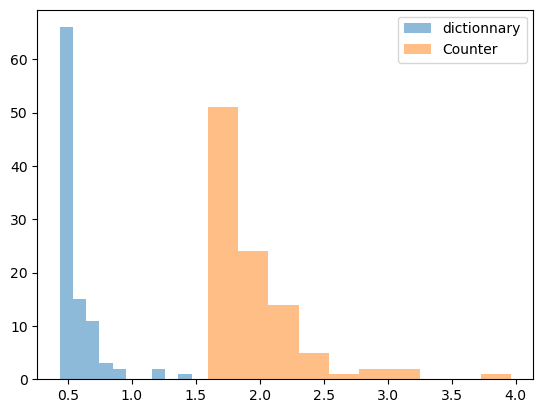

In [52]:
plt.figure()
plt.hist(distributionf1, alpha=0.5, label='dictionnary')
plt.hist(distributionf2, alpha=0.5, label='Counter')
plt.legend(loc='upper right')
plt.show()
